In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [2]:
df = pd.read_csv("ds-home-5min-avg.csv")
df['newDate']=pd.to_datetime(df['date'],  infer_datetime_format=True)
df['time'] = [d.time() for d in df['newDate']]
df['day'] = [d.date() for d in df['newDate']]
df=df.sort_values(by=['newDate'])
df.info()


df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1005 entries, 325 to 363
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     1005 non-null   object        
 1   pre      1005 non-null   float64       
 2   hum      1005 non-null   float64       
 3   tem      1005 non-null   float64       
 4   occ      1005 non-null   object        
 5   newDate  1005 non-null   datetime64[ns]
 6   time     1005 non-null   object        
 7   day      1005 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 70.7+ KB


,date,pre,hum,tem,occ,newDate,time,day
325,14/05/2020 21:05,94269.77,54.45,30.99,L,2020-05-14 21:05:00,21:05:00,2020-05-14
833,14/05/2020 21:10,94266.83,54.26,31.01,L,2020-05-14 21:10:00,21:10:00,2020-05-14
46,14/05/2020 21:15,94272.60,54.85,31.01,L,2020-05-14 21:15:00,21:15:00,2020-05-14
352,14/05/2020 21:20,94271.31,55.12,30.92,L,2020-05-14 21:20:00,21:20:00,2020-05-14
431,14/05/2020 21:25,94274.32,55.42,30.90,L,2020-05-14 21:25:00,21:25:00,2020-05-14


In [3]:
df.tail()

,date,pre,hum,tem,occ,newDate,time,day
809,04/06/2020 22:45,94573.86,56.85,31.57,L,2020-06-04 22:45:00,22:45:00,2020-06-04
845,04/06/2020 22:50,94581.41,56.67,31.69,L,2020-06-04 22:50:00,22:50:00,2020-06-04
318,04/06/2020 22:55,94585.56,56.70,31.78,L,2020-06-04 22:55:00,22:55:00,2020-06-04
69,04/06/2020 23:00,94590.30,56.60,31.88,M,2020-06-04 23:00:00,23:00:00,2020-06-04
363,04/06/2020 23:05,94593.74,56.53,31.93,M,2020-06-04 23:05:00,23:05:00,2020-06-04


(array([18399., 18403., 18407., 18411., 18414., 18418.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

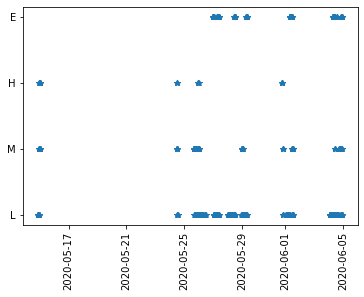

In [4]:
plt.plot(df['newDate'], df['occ'], '*')
plt.xticks(rotation='vertical')

In [5]:
names = df['occ']
names.unique()

array(['L', 'M', 'H', 'E'], dtype=object)

In [6]:
L = df.loc[df['occ'] == 'L']
L = L.iloc[:150]
Else = df.loc[df['occ'] != 'L']
df = pd.concat([L, Else])

In [7]:
df['occ'].value_counts()
#g = df.groupby('occ')
#df = pd.DataFrame(g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True)))

E    173
L    150
M    121
H     23
Name: occ, dtype: int64

In [8]:
feature_names = ['pre','hum','tem']
X = df[feature_names]
y = df['occ']

In [9]:
y

325    L
833    L
46     L
352    L
431    L
      ..
43     E
152    E
336    E
69     M
363    M
Name: occ, Length: 467, dtype: object

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [11]:
# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, np.newaxis]).toarray()

C:\Users\rober\anaconda3\envs\ML\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [12]:
Y

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [13]:
# Scale data to have mean 0 and variance 1 
# which is importance for convergence of the neural network
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
X_scaled

array([[-0.57924803, -0.10511153,  0.33292122],
       [-0.58602644, -0.13595635,  0.34395794],
       [-0.57272323, -0.04017508,  0.34395794],
       ...,
       [ 0.09331338,  0.27314329,  0.6364309 ],
       [ 0.15976026,  0.24392189,  0.82405506],
       [ 0.16769147,  0.23255801,  0.85164685]])

In [15]:
# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.25, random_state=2)

In [16]:
n_features = X.shape[1]
n_classes = Y.shape[1]
print(n_features)
print(n_classes)

3
4


In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu', input_shape=(3,)))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(4, activation='softmax'))

Using TensorFlow backend.


In [37]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
hc = model.fit(X_train, Y_train,epochs=100, batch_size=1, verbose=1, validation_data=(X_test, Y_test))

Train on 350 samples, validate on 117 samples
Epoch 1/100
350/350 [==============================] - 1s 3ms/step - loss: 0.2561 - accuracy: 0.8857 - val_loss: 0.6641 - val_accuracy: 0.8291
Epoch 2/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2495 - accuracy: 0.8657 - val_loss: 0.5895 - val_accuracy: 0.8291
Epoch 3/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2467 - accuracy: 0.8886 - val_loss: 0.5977 - val_accuracy: 0.7949
Epoch 4/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2626 - accuracy: 0.8743 - val_loss: 0.5737 - val_accuracy: 0.8376
Epoch 5/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2588 - accuracy: 0.8800 - val_loss: 0.5527 - val_accuracy: 0.8462
Epoch 6/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2620 - accuracy: 0.8743 - val_loss: 0.6085 - val_accuracy: 0.8376
Epoch 7/100
350/350 [==============================] - 1s 2ms/step - loss: 0.2436 - accuracy: 0.

In [38]:
score = model.evaluate(X_test, Y_test,verbose=1)
print(score)

117/117 [==============================] - 0s 51us/step
[0.6152644463074513, 0.8888888955116272]


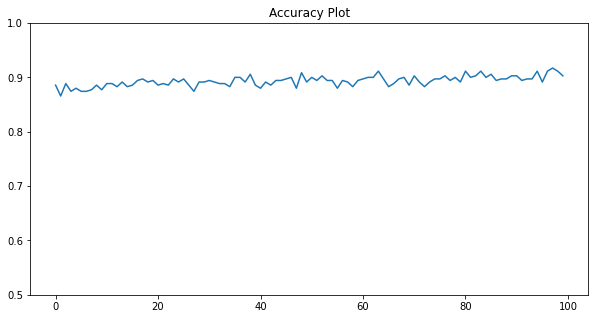

In [39]:
plt.figure(figsize=(10, 5))

val_acc = hc.history['accuracy']
plt.plot(val_acc)

plt.title("Accuracy Plot")
plt.ylim(0.5, 1)
plt.show()

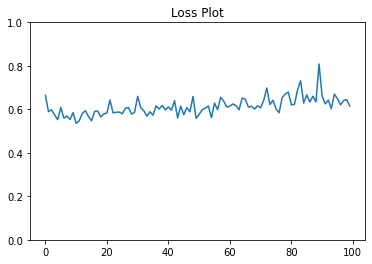

In [42]:
val_loss = hc.history['val_loss']
plt.plot(val_loss)
    
plt.title("Loss Plot")
plt.ylim(0, 1)
plt.show()

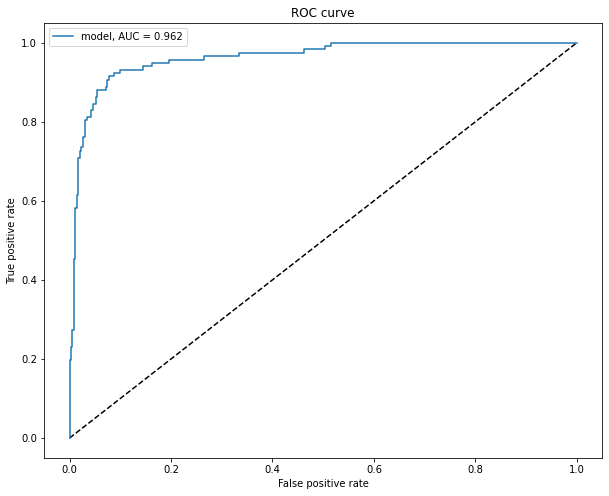

In [24]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')

    
Y_pred = model.predict(X_test)
fpr, tpr, threshold = roc_curve(Y_test.ravel(), Y_pred.ravel())
    
plt.plot(fpr, tpr, label='{}, AUC = {:.3f}'.format('model', auc(fpr, tpr)))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend();